In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Basic Look into datasets

In [78]:
#Loading Data sets
train_data = pd.read_csv(
    "/home/fnafis/Desktop/Machine_Learning_and_Data_Mining/Project/Earthquake_Data/Earthquakes_TRAIN.txt",
             sep = '\s+', header = None)
test_data = pd.read_csv(
    "/home/fnafis/Desktop/Machine_Learning_and_Data_Mining/Project/Earthquake_Data/Earthquakes_TEST.txt",
             sep = '\s+', header = None)
data_file = train_data
print("(Rows, Columns) = ",data_file.shape)
print(data_file.iloc[0:15,0:8])
#train_data.head

data_file.describe()

(Rows, Columns) =  (322, 513)
      0         1         2         3         4         5         6         7
0   1.0 -0.518009 -0.518009  2.654211 -0.518009 -0.518009 -0.518009 -0.518009
1   0.0  1.943733 -0.353115 -0.353115 -0.353115 -0.353115 -0.353115 -0.353115
2   0.0  2.638517 -0.316102 -0.316102 -0.316102 -0.316102 -0.316102 -0.316102
3   0.0 -0.531138 -0.531138 -0.531138 -0.531138 -0.531138 -0.531138 -0.531138
4   1.0 -0.593665  2.020105  1.174727 -0.593665 -0.593665  1.606043  1.217859
5   0.0  4.726718 -0.240247 -0.240247 -0.240247 -0.240247 -0.240247 -0.240247
6   0.0 -0.429507 -0.429507 -0.429507 -0.429507 -0.429507 -0.429507 -0.429507
7   0.0 -0.550773 -0.550773 -0.550773 -0.550773 -0.550773 -0.550773  2.315306
8   0.0 -0.207146 -0.207146 -0.207146 -0.207146 -0.207146 -0.207146 -0.207146
9   0.0  1.479197 -0.528827 -0.528827  1.497704 -0.528827 -0.528827 -0.528827
10  0.0 -0.447994 -0.447994 -0.447994 -0.447994 -0.447994 -0.447994 -0.447994
11  0.0 -0.689040  1.132969  1.174

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,...,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,0.180124,0.054088,-0.012575,0.060070,0.063550,-0.008471,0.000619,0.037939,-0.012117,0.028848,...,-0.059989,-0.013925,-0.053675,-0.090294,-0.093705,-0.195097,-0.179216,-0.213229,-0.209882,-0.228488
std,0.384889,1.071217,0.974196,1.037486,1.063598,0.950326,0.990520,1.061624,1.007050,1.030407,...,0.940596,1.036101,0.911251,0.893855,0.871572,0.746654,0.777180,0.748120,0.777103,0.760789
min,0.000000,-0.885817,-0.885817,-0.885817,-0.786819,-0.786819,-0.885817,-0.885817,-0.885817,-0.754615,...,-0.885817,-0.885817,-0.885817,-0.786819,-0.885817,-0.885817,-0.885817,-0.885817,-0.885817,-0.885817
25%,0.000000,-0.490417,-0.493297,-0.485682,-0.497065,-0.496431,-0.491669,-0.493297,-0.494246,-0.490417,...,-0.502590,-0.513187,-0.494246,-0.513434,-0.500203,-0.515701,-0.514340,-0.519327,-0.514656,-0.525721
50%,0.000000,-0.391835,-0.406376,-0.385140,-0.393743,-0.395129,-0.401142,-0.393743,-0.407789,-0.394571,...,-0.411163,-0.412661,-0.401142,-0.415883,-0.407789,-0.431448,-0.422763,-0.435955,-0.431448,-0.437353
75%,0.000000,-0.252087,-0.262655,-0.245584,-0.249521,-0.252087,-0.262655,-0.251634,-0.266820,-0.251634,...,-0.269116,-0.266820,-0.265129,-0.281923,-0.280682,-0.304368,-0.304173,-0.308492,-0.309232,-0.312454
max,1.000000,5.199567,3.927112,4.740132,4.097649,4.889646,4.316287,6.270377,4.296305,5.157316,...,4.661194,4.954224,3.885235,3.231093,3.887926,3.556661,3.597800,3.745815,5.497679,3.744222


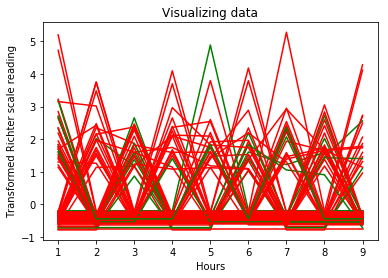

In [79]:
#Visualizing Data
def plot_data(data_file):
    max_rows = data_file.shape[0]
    max_cols = data_file.shape[1]
    for i in range(max_rows):
        if data_file.iloc[i,0] == 0:
            color = 'r'
        else:
            color = 'green'
    
        a = data_file.iloc[i,1:max_cols]
        plt.plot(a, color = color)
        plt.xlabel("Hours")
        plt.ylabel("Transformed Richter scale reading")
        plt.title("Visualizing data")
        #plt.legend("Green = Positive case","Red = Negative case")
        plt.savefig("visualizing_data.png")
        
plot_data(train_data.iloc[0:100,0:10])

# Implementing Neural Network (NN)

### Setting Data to variables and Classes

In [80]:
X_train = train_data.iloc[0:,1:]
y_train = train_data.iloc[0:,0]

X_test = test_data.iloc[0:,1:]
y_test = test_data.iloc[0:,0]

### Importing packages

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

### Data Preprocessing

In [82]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training Network, Prediction and Evaluation

In [83]:
def neural_network(X_train,y_train,X_test,y_test):
    #Training
    mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20),max_iter=500)
    mlp.fit(X_train, y_train)

    #Making Prediction
    prediction = mlp.predict(X_test)

    #Evaluation
    #Do not name the variable confusion_matrix
    conf_matrix = confusion_matrix(y_test,prediction)
    #print(conf_matrix)

    trace = np.trace(conf_matrix)
    total_sum = np.sum(conf_matrix)

    accuracy = trace/total_sum

    #print("Accuracy : ",accuracy)
    
    return conf_matrix
    #return accuracy

    
neural_network(X_train,y_train, X_test, y_test)

array([[86, 18],
       [28,  7]])

### Getting Accuracy plot

In [84]:
iteration = 10
conf_matrix = np.zeros((2,2)) #because we already know we have only 2 classes: 0 and 1
for i in range(iteration):
    new_conf_matrix = neural_network(X_train,y_train,X_test,y_test)
    conf_matrix = conf_matrix + new_conf_matrix
    #print("Accuracy ",i,":",accuracies[i])
#print(conf_matrix)

#plt.plot(accuracies)
trace = np.trace(conf_matrix)
total_sum = np.sum(conf_matrix)

normalized_conf_matrix = conf_matrix/total_sum
print(normalized_conf_matrix)

accuracy = trace/total_sum

print("Accuracy : ",accuracy)


[[0.6352518  0.11294964]
 [0.20071942 0.05107914]]
Accuracy :  0.6863309352517986


# Implementing Neural Network with Keras

322/322 [==============================] - 0s 864us/step
Confusion matrix:
 [[93 11]
 [26  9]]
Accuracy:73.38%


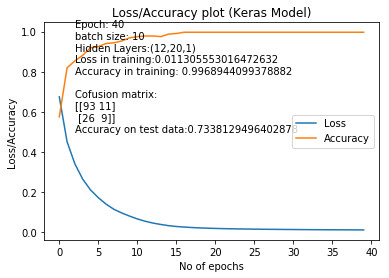

In [85]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
np.random.seed(7)
# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
#X = dataset[:,0:8]
X = X_train
input_dimension = X.shape[1]
#Y = dataset[:,8]
Y = y_train


# create model
model = Sequential() #Means we will create some layers sequentially
#neurons in hidden layers
layer_1_neurons = 12
layer_2_neurons = 20
layer_3_neurons = 1
#Layer 1, 
model.add(Dense(layer_1_neurons, input_dim=input_dimension, activation='relu'))
#Layer 2
model.add(Dense(layer_2_neurons, activation='relu'))
#Layer 3
model.add(Dense(layer_3_neurons, activation='sigmoid'))



# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model
epochs = 40
batch_size = 10
hist = model.fit(X, Y, epochs=epochs, batch_size=batch_size, verbose = 0)
losses = hist.history['loss']
accuracies = hist.history['acc']


# evaluate the model
scores = model.evaluate(X, Y)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print(scores)





#make prediction
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]
#print(predictions)
#print(rounded)



#Get confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, rounded)
print("Confusion matrix:\n",conf_matrix)
accuracy = np.trace(conf_matrix)/np.sum(conf_matrix)
print("Accuracy:%.2f%%" % (accuracy*100))


#Plotting loss and accuracy
plt.plot(losses, label = 'Loss')
plt.plot(accuracies, label = 'Accuracy')
plt.legend()
plt.xlabel("No of epochs")
plt.ylabel("Loss/Accuracy")
plt.title("Loss/Accuracy plot (Keras Model)")

basic_info = "\nEpoch: "+str(epochs)+"\nbatch size: "+str(batch_size)
layer_info = "\nHidden Layers:("+str(layer_1_neurons)+","+str(layer_2_neurons)+","+str(layer_3_neurons)+")"
training_loss_acc_text = "\nLoss in training:" + str(scores[0]) + "\nAccuracy in training: " + str(scores[1])
actual_accuracy_text = "\nAccuracy on test data:"+str(accuracy)
conf_matrix_text = "\nCofusion matrix:\n"+str(conf_matrix)
figure_text = basic_info+layer_info + training_loss_acc_text + "\n" + conf_matrix_text + actual_accuracy_text
plt.text(2,0.5,figure_text)

plt.savefig("keras_model.png")

# Rotation Forest

In [102]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import graphviz

### Decision tree

In [103]:
def decision_tree(X_train,y_train, n_features):
    features = np.random.randint(low = 0, high = X_train.shape[1], size = n_features)
    X_train = X_train[:,features]
    #Rotation forrest
    #pca = PCA(n_components=n_features)
    #pca.fit(X_train.transpose())
    #X_train = pca.components_.transpose()
    clf = tree.DecisionTreeClassifier()
    #clf = RandomForestClassifier(n_estimators=10)
    clf = clf.fit(X_train,y_train)
    return clf,features
#decision_tree(X_train, y_train, 2)

### Bootstrapping

In [104]:
def bootstrapping(data, n_bootstrap):
    bootstrap_indices = np.random.randint(low = 0, high = len(data), size = n_bootstrap)
    bootstrapped = data[bootstrap_indices]
    return bootstrapped
#X_tr = bootstrapping(X_train,5)
#y_tr = bootstrapping(y_train, 5)
#decision_tree(X_tr, y_tr, 2)

### Creating Forest

In [105]:
def Random_Forest_Algorithm(X_train, y_train, n_trees, n_bootstrap, n_features):
    forrest = []
    for i in range(n_trees):
        X_tr = bootstrapping(X_train,n_bootstrap)
        y_tr = bootstrapping(y_train, n_bootstrap)
        tree,features = decision_tree(X_tr, y_tr, n_features)
        forrest.append(tree)
    return forrest,features

### Making Prediction

In [106]:
#Getting prediction for each trees in the forest
def Forrest_Predictions(X_test,forrest,features):
    forrest_predictions = {}
    for i in range(len(forrest)):
        column_name = "tree_{}".format(i)
        prediction = forrest[i].predict(X_test[:,features])
        forrest_predictions[column_name] = prediction
    forrest_predictions = pd.DataFrame(forrest_predictions)
    return forrest_predictions




#Getting final prediction using democracy of the trees
def Final_Prediction(forrest_predictions):
    
    predictions = forrest_predictions.sum(axis = 1)

    for i in range(len(predictions)):
        if predictions.loc[i]< 5:
            predictions.loc[i] = 1
        else:
            predictions.loc[i] = 0

    return predictions




### Implementing Rotation forest on the data

In [107]:
#PCA on the traning set
pca = PCA(n_components = 4)
#print(X_train)
X_train = pca.fit(X_train.transpose()).components_.transpose()
#print(X_train)


#Getting the forests and the features used in each trees of forest
forrest,features = Random_Forest_Algorithm(X_train,y_train, 100, 50, 25)
#print(features)

#Making prediction
forrest_predictions = Forrest_Predictions(X_test, forrest, features)
prediction = Final_Prediction(forrest_predictions)

conf_matrix = confusion_matrix(prediction,y_test)

print(conf_matrix)

print(np.trace(conf_matrix)/np.sum(conf_matrix))

[[104  35]
 [  0   0]]
0.7482014388489209


### Random Forest by Built in function

In [108]:
clf = tree.DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=120)
clf = clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
conf_matrix = confusion_matrix(prediction, y_test)
print(conf_matrix)
accuracy = np.trace(conf_matrix)/np.sum(conf_matrix)
print(accuracy)

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 512 